## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [2]:
# solução
filmes = pd.read_csv('movies.csv')
filmes.rename(columns= {'movieId': 'filmeId', 'title':'titulo', 'genres':'generos'}, inplace=True)

In [3]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [5]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,filmeId,titulo,generos,ano_de_lancamento
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [6]:
# solução
notas = pd.read_csv('ratings.csv')
notas.rename(columns = {'userId':'usuarioId', 'movieId': 'filmeId', 'rating':'nota', 'timestamp':'momento'}, inplace=True)

In [7]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [8]:
# solução
medias = []
for idi in filmes['filmeId']:
    medias.append(round(notas[notas['filmeId'] == idi]['nota'].mean(), 2))
filmes['nota_media'] = medias

## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [9]:
# solução para calcular o total de votos por filme

total_votos = []
for i in filmes.filmeId:
    total_votos.append(notas[notas['filmeId'] == i]['filmeId'].count())
#total_votos

In [10]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = total_votos
filmes = filmes[filmes['total_de_votos'] >= 50]

In [11]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 8691
Data columns (total 6 columns):
filmeId              450 non-null int64
titulo               450 non-null object
generos              450 non-null object
ano_de_lancamento    450 non-null float64
nota_media           450 non-null float64
total_de_votos       450 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 24.6+ KB


In [12]:
sns.set_palette('Set2')
sns.set_style('darkgrid')

# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

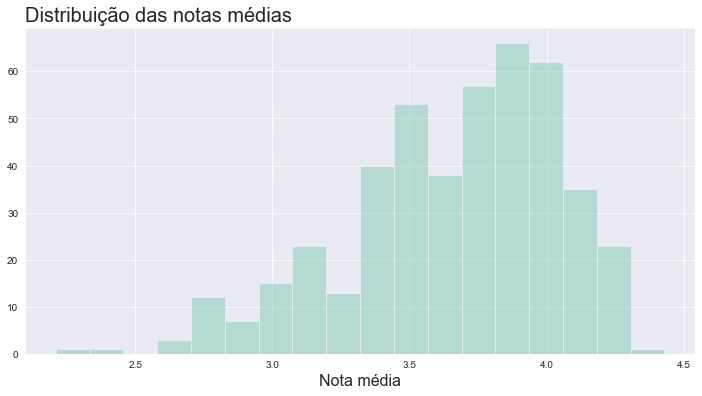

In [13]:
# solução histograma
ax = sns.distplot(filmes['nota_media'], kde=False)
ax.figure.set_size_inches(12, 6)

ax.set_title('Distribuição das notas médias', fontsize = 20, loc='left')
ax.set_xlabel('Nota média', fontsize=16);

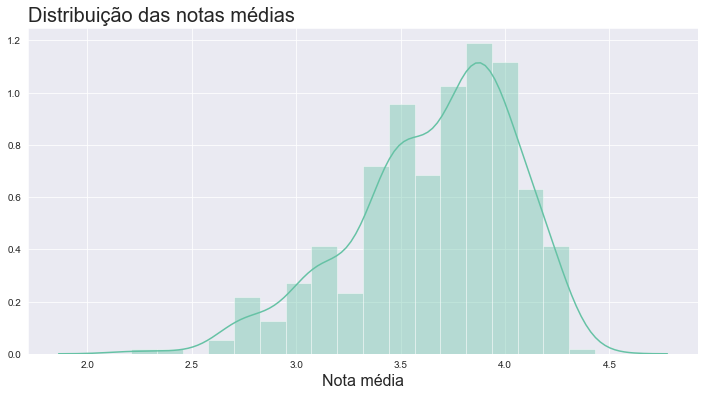

In [14]:
# solução cumulativa
ax = sns.distplot(filmes['nota_media'], kde=True)
ax.figure.set_size_inches(12, 6)

ax.set_title('Distribuição das notas médias', fontsize = 20, loc='left')
ax.set_xlabel('Nota média', fontsize=16);

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

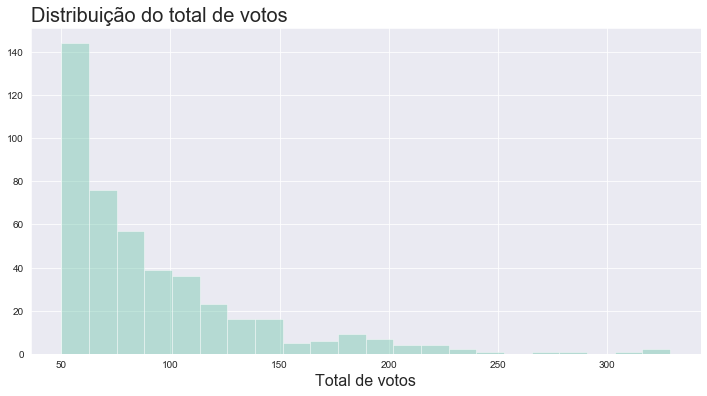

In [15]:
# solução histograma
ax = sns.distplot(filmes['total_de_votos'], kde=False)
ax.figure.set_size_inches(12, 6)

ax.set_title('Distribuição do total de votos', fontsize = 20, loc='left')
ax.set_xlabel('Total de votos', fontsize=16);

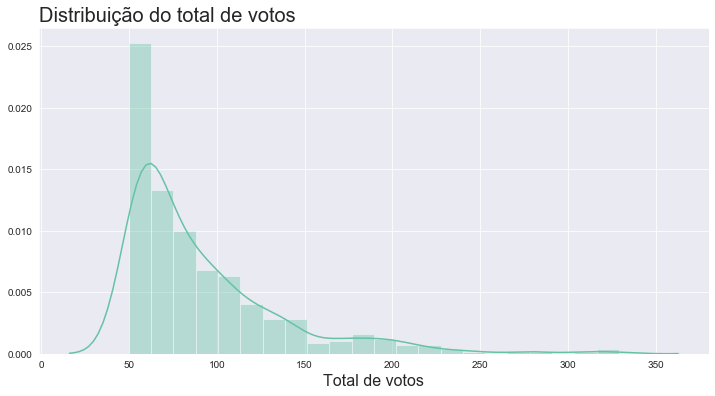

In [16]:
# solução cumulativa
ax = sns.distplot(filmes['total_de_votos'], kde=True)
ax.figure.set_size_inches(12, 6)

ax.set_title('Distribuição do total de votos', fontsize = 20, loc='left')
ax.set_xlabel('Total de votos', fontsize=16);

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [17]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(.2)
nota_limite_dos_20_porcento

3.378

In [18]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.38


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [19]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [20]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,filmeId,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),1995.0,3.92,215,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,3.43,110,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,3.26,52,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,6,Heat (1995),1995.0,3.95,102,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),1995.0,3.19,54,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

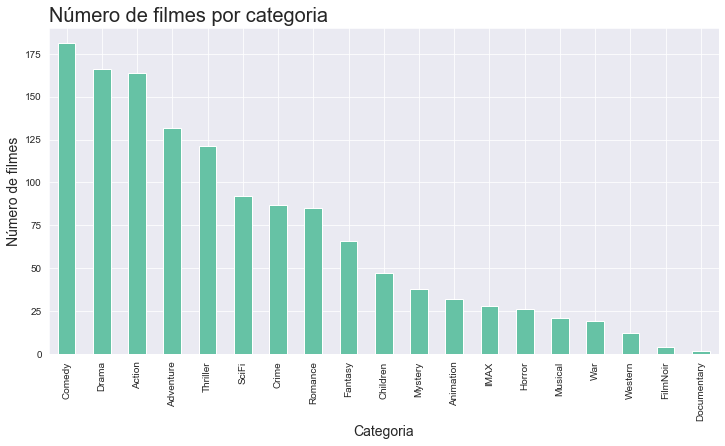

In [21]:
# solução
ax = generos.sum().sort_values(ascending = False).plot(kind='bar', figsize=(12, 6))
ax.set_title('Número de filmes por categoria', fontsize=20, loc='left')
ax.set_xlabel('Categoria', fontsize=14)
ax.set_ylabel('Número de filmes', fontsize=14);

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [22]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending=False).head()

In [23]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [24]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0
1,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0
3,102,0,0,0,0,102,0,0,0,0,0,0,0,0,0,0,102,0,0
4,0,0,0,0,54,0,0,0,0,0,0,0,0,0,54,0,0,0,0


In [25]:
# solucão
votos_por_genero_por_filme_ord = votos_por_genero_por_filme.sum().sort_values(ascending=False)

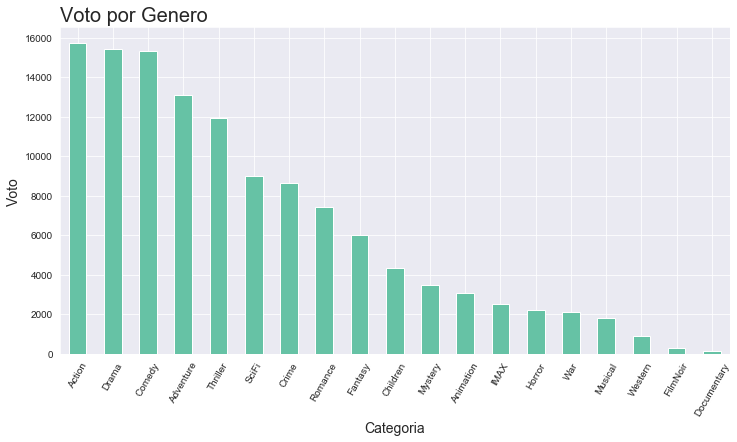

In [26]:
# solução
ax = votos_por_genero_por_filme_ord.plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=60)
ax.set_title('Voto por Genero', fontsize=20, loc='left')
ax.set_xlabel('Categoria', fontsize=14)
ax.set_ylabel('Voto', fontsize=14);


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [27]:
# solucao código
filme_por_genero = []
for genero in votos_por_genero_por_filme.columns:
    filme_por_genero.append(votos_por_genero_por_filme[votos_por_genero_por_filme[genero] != 0][genero].count())
filme_por_genero

voto_por_filme = (votos_por_genero_por_filme_ord.sort_index() / filme_por_genero).round(2)

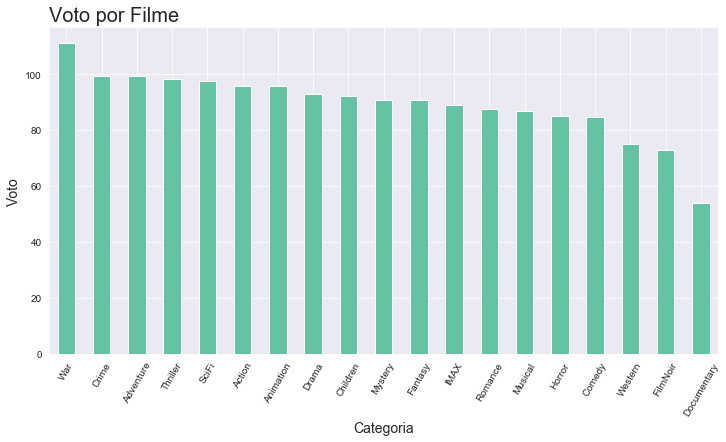

In [28]:
# solução com visualização 

ax = voto_por_filme.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=60)
ax.set_title('Voto por Filme', fontsize=20, loc='left')
ax.set_xlabel('Categoria', fontsize=14)
ax.set_ylabel('Voto', fontsize=14);

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    Concluo que o gênero “Action” é o mais popular e é a terceira categoria que mais possui filme, o que faz com que cada filme não tenha tanto voto individualmente, já o gênero “War”, possuí poucos filmes que acumulam pouca popularidade, entretanto, é a categoria que possui filmes mais voto por filme individualmente, ou seja, possuí os filmes mais populares
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [29]:
filmes.head()

,filmeId,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),1995.0,3.92,215,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,3.43,110,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,3.26,52,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,6,Heat (1995),1995.0,3.95,102,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),1995.0,3.19,54,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


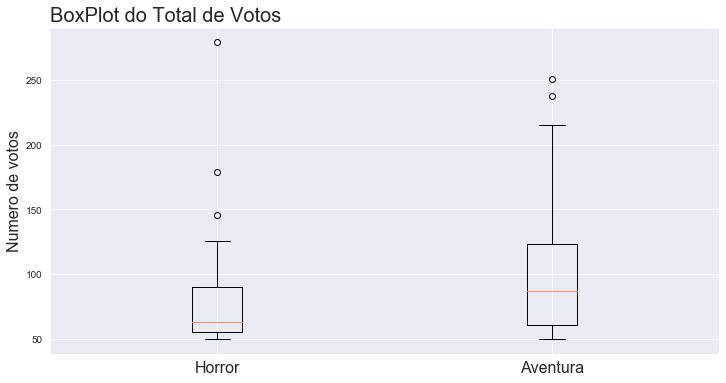

In [30]:
# solução:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))

x1 = filmes[filmes['Horror'] == 1]['total_de_votos']
x2 = filmes[filmes['Adventure'] == 1]['total_de_votos']

plt.boxplot([x1, x2], labels=['Horror', 'Aventura'])
plt.xticks(fontsize=16)

ax.set_title('BoxPlot do Total de Votos', fontsize=20, loc='left')
ax.set_ylabel('Numero de votos', fontsize=16);

In [31]:
filmes.groupby(['Horror', 'Adventure'])['total_de_votos'].count()

Horror  Adventure
0       0            295
        1            129
1       0             23
        1              3
Name: total_de_votos, dtype: int64

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

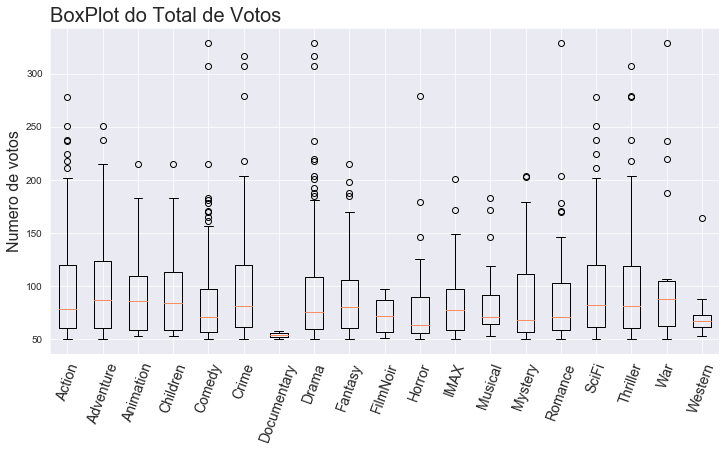

In [32]:
fig, ax = plt.subplots(figsize=(12,6))

x = []
for genero in generos.columns:
    x.append(filmes[filmes[genero] == 1]['total_de_votos'])
    
plt.boxplot(x, labels=generos.columns)
plt.xticks(rotation=70, fontsize=14)
ax.set_title('BoxPlot do Total de Votos', fontsize=20, loc='left')
ax.set_ylabel('Numero de votos', fontsize=16);

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: 
    Sugiro o gênero ‘adventure’ pois ele possuí uma distribuição nos dados mais favoráveis, em relação ao número de votos, do que o gênero ‘horror’


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

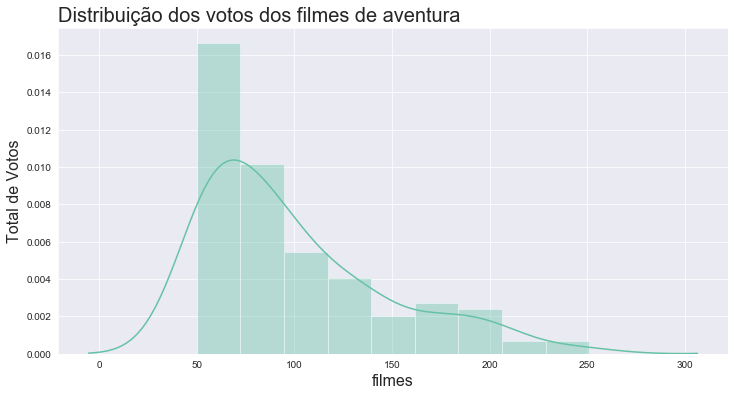

In [33]:
# solucao histograma de aventura
ax = sns.distplot( filmes[filmes['Adventure'] == 1]['total_de_votos'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição dos votos dos filmes de aventura', fontsize = 20, loc='left')
ax.set_xlabel('filmes', fontsize=16)
ax.set_ylabel('Total de Votos', fontsize=16);

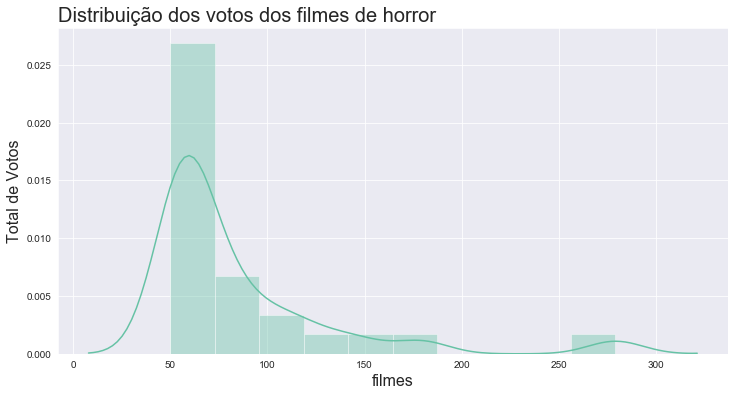

In [34]:
# solucao histograma de horror
ax = sns.distplot( filmes[filmes['Horror'] == 1]['total_de_votos'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição dos votos dos filmes de horror', fontsize = 20, loc='left')
ax.set_xlabel('filmes', fontsize=16)
ax.set_ylabel('Total de Votos', fontsize=16);

In [35]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_, p_valor_adv = normaltest(filmes[filmes['Adventure'] == 1]['total_de_votos'])

print(f'{p_valor_adv * 100:.02f}% -> p_valor < 5%, rejeita a hipótese de que os votos dos filmes de aventura se distribuam como uma normal')

_, p_valor_adv = normaltest(filmes[filmes['Horror'] == 1]['total_de_votos'])

print(f'{p_valor_adv * 100:.02f}% -> p_valor < 5%, rejeita a hipótese de que os votos dos filmes de horror se distribuam como uma normal')

0.00% -> p_valor < 5%, rejeita a hipótese de que os votos dos filmes de aventura se distribuam como uma normal
0.00% -> p_valor < 5%, rejeita a hipótese de que os votos dos filmes de horror se distribuam como uma normal


In [36]:
# solução com o teste desejado
from scipy.stats import ranksums

_, p_valor = ranksums(filmes[filmes['Adventure'] == 1]['total_de_votos'], filmes[filmes['Horror'] == 1]['total_de_votos'])
print(f'{p_valor * 100:.02f}% -> p_valor < 5% rejeita H0, portanto as amostras não possuem a mesma distribuição')

4.78% -> p_valor < 5% rejeita H0, portanto as amostras não possuem a mesma distribuição


### Solução (explique sua conclusão):
    De acordo com os testes, não podemos afirmar que a distribuição do total de votos de cada gênero siga uma normal. Também não podemos afirmar que as distribuições tenham a mesma distribuição.


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

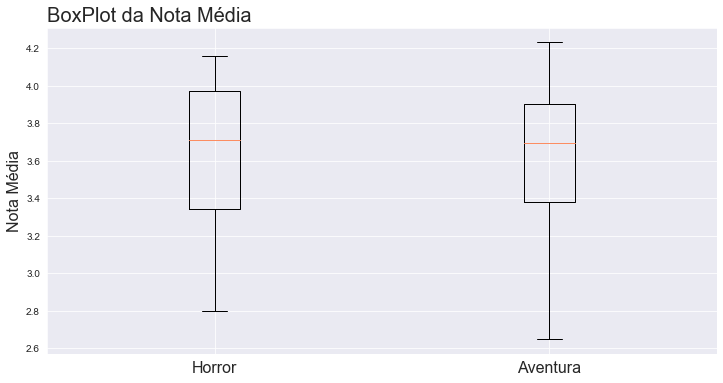

In [37]:
# solução:
fig, ax = plt.subplots(figsize=(12,6))

x1 = filmes[filmes['Horror'] == 1]['nota_media']
x2 = filmes[filmes['Adventure'] == 1]['nota_media']

plt.boxplot([x1, x2], labels=['Horror', 'Aventura'])
plt.xticks(fontsize=16)

ax.set_title('BoxPlot da Nota Média', fontsize=20, loc='left')
ax.set_ylabel('Nota Média', fontsize=16);

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
    Ambos os filmes apresentam um box-plot bem semelhante, o que podemos observar é uma sutil diferença em relaçao ao número de possiveis outliers e a diferença interquartil. como não é necessário que tenha muitas pessoas assistindo, recomendo o gênero 'horror', pois ele apresenta uma variabilidade um pouco menor


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

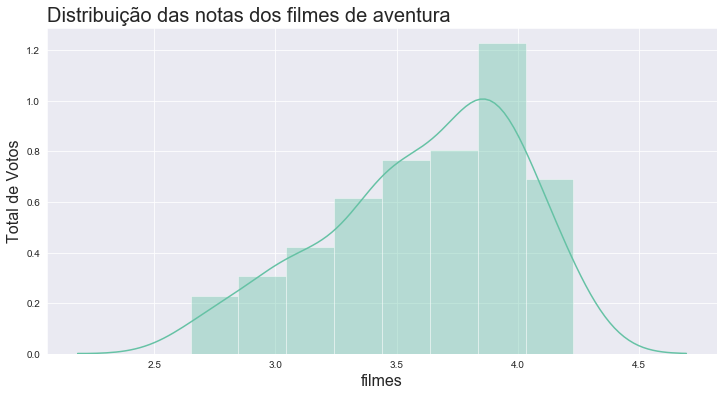

In [38]:
# solucao histograma de aventura
ax = sns.distplot( filmes[filmes['Adventure'] == 1]['nota_media'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição das notas dos filmes de aventura', fontsize = 20, loc='left')
ax.set_xlabel('filmes', fontsize=16)
ax.set_ylabel('Total de Votos', fontsize=16);

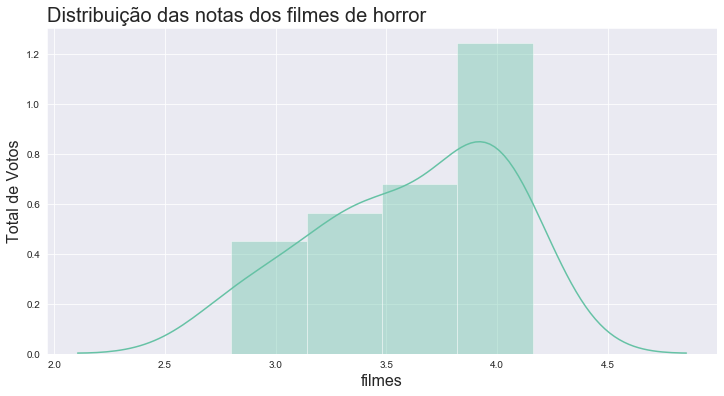

In [39]:
# solucao histograma de horror
ax = sns.distplot( filmes[filmes['Horror'] == 1]['nota_media'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição das notas dos filmes de horror', fontsize = 20, loc='left')
ax.set_xlabel('filmes', fontsize=16)
ax.set_ylabel('Total de Votos', fontsize=16);

In [40]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_, p_valor_adv = normaltest(filmes[filmes['Adventure'] == 1]['nota_media'])

print(f'{p_valor_adv * 100:.02f}% -> p_valor > 5%, não rejeita a hipótese de que os votos dos filmes de aventura se distribuam como uma normal')

_, p_valor_adv = normaltest(filmes[filmes['Horror'] == 1]['nota_media'])

print(f'{p_valor_adv * 100:.02f}% -> p_valor > 5%, não rejeita a hipótese de que os votos dos filmes de horror se distribuam como uma normal')

1.29% -> p_valor > 5%, não rejeita a hipótese de que os votos dos filmes de aventura se distribuam como uma normal
21.10% -> p_valor > 5%, não rejeita a hipótese de que os votos dos filmes de horror se distribuam como uma normal


In [41]:
# solução com o teste desejado

_, p_valor = ranksums(filmes[filmes['Adventure'] == 1]['nota_media'], filmes[filmes['Horror'] == 1]['total_de_votos'])
print(f'{p_valor * 100:.02f}% -> p_valor < 5% rejeita H0, portanto as amostras não possuem a mesma distribuição')

0.00% -> p_valor < 5% rejeita H0, portanto as amostras não possuem a mesma distribuição


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
    De acordo com os resultados obtidos, podemos concluir que a distribuição das notas dos filmes de aventura se distribuem como uma normal, já as notas dos filmes de terror não.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
    Nesse caso eu recomendo o gênero "Adventure", pois ele é mais popular que "Horror", e portanto é mais provavel que seja assistido por mais gente


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [42]:
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0
1,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0
3,102,0,0,0,0,102,0,0,0,0,0,0,0,0,0,0,102,0,0
4,0,0,0,0,54,0,0,0,0,0,0,0,0,0,54,0,0,0,0


In [43]:
# solução: calculando os 2 generos mais votados
votos_por_genero_por_filme.sum().sort_values(ascending=False).head(2)

Action    15734
Drama     15445
dtype: int64

In [44]:
# solução: encontrando os top 5 filmes desses generos
top_filmes = filmes.sort_values(by='nota_media', ascending=False).query('Action == 1 and Drama == 1').head()
top_filmes

,filmeId,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
2226,2959,Fight Club (1999),1999.0,4.27,218,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6710,58559,"Dark Knight, The (2008)",2008.0,4.24,149,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
909,1208,Apocalypse Now (1979),1979.0,4.22,107,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1503,2028,Saving Private Ryan (1998),1998.0,4.15,188,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4176,6016,City of God (Cidade de Deus) (2002),2002.0,4.15,75,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [45]:
# solucao
gen = generos.columns.to_list()
gen.append('nota_media')
maior_corr_nm = filmes[gen].corr()['nota_media'].sort_values(ascending=False)[1:3]
menor_corr_nm = filmes[gen].corr()['nota_media'].sort_values()[0:2]
print(f'''
Generos com maior correlação com nota_media:
{'-' * 30}
{maior_corr_nm}
{'-' * 30}
Generos com menor correlação com nota_media:
{menor_corr_nm}

''')


Generos com maior correlação com nota_media:
------------------------------
Drama    0.277586
Crime    0.190199
Name: nota_media, dtype: float64
------------------------------
Generos com menor correlação com nota_media:
Comedy   -0.255430
Action   -0.154591
Name: nota_media, dtype: float64




##### Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [46]:
# solucao
gen = generos.columns.to_list()
gen.append('total_de_votos')
maior_corr_tv = filmes[gen].corr()['total_de_votos'].sort_values(ascending=False)[1:3]
menor_corr_tv = filmes[gen].corr()['total_de_votos'].sort_values()[0:2]
print(f'''
Generos com maior correlação com total_de_votos:
{'-' * 30}
{maior_corr_tv}
{'-' * 30}
Generos com menor correlação com total_de_votos:
{menor_corr_tv}

''')


Generos com maior correlação com total_de_votos:
------------------------------
Adventure    0.104380
War          0.087999
Name: total_de_votos, dtype: float64
------------------------------
Generos com menor correlação com total_de_votos:
Comedy    -0.128527
Western   -0.060789
Name: total_de_votos, dtype: float64




## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

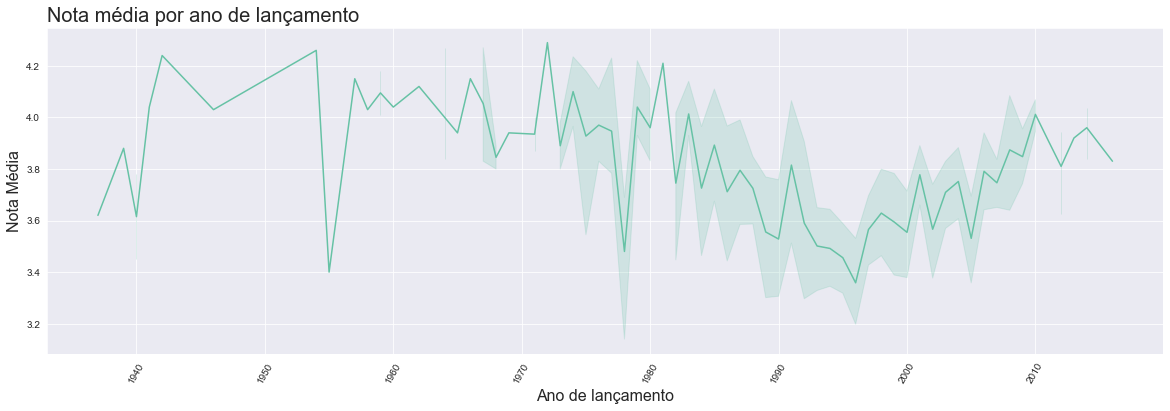

In [47]:
# solucao
ax = sns.lineplot(x = 'ano_de_lancamento', y = 'nota_media', data = filmes)
ax.figure.set_size_inches(20,6)
ax.set_title('Nota média por ano de lançamento', fontsize=20, loc='left')
ax.set_ylabel('Nota Média', fontsize=16)
ax.set_xlabel('Ano de lançamento', fontsize=16)
plt.xticks(rotation=60);

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [48]:
# solução (código)
filmes[['nota_media', 'ano_de_lancamento']].corr()

,nota_media,ano_de_lancamento
nota_media,1.000000,-0.159215
ano_de_lancamento,-0.159215,1.000000


### Solução (explicação)
    A correlação negativa indica que quanto mais novo o filme, menor a nota dele tende a ser, isso pode ser explicado pela hipótese de que com a evolução dos filmes, as pessoas tenham se tornado mais críticas, mais exigentes e também, de que com o sucesso de alguns filmes, tenham sido criado mais filmes comerciais, apenas com o intuito de vender bilheteria


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

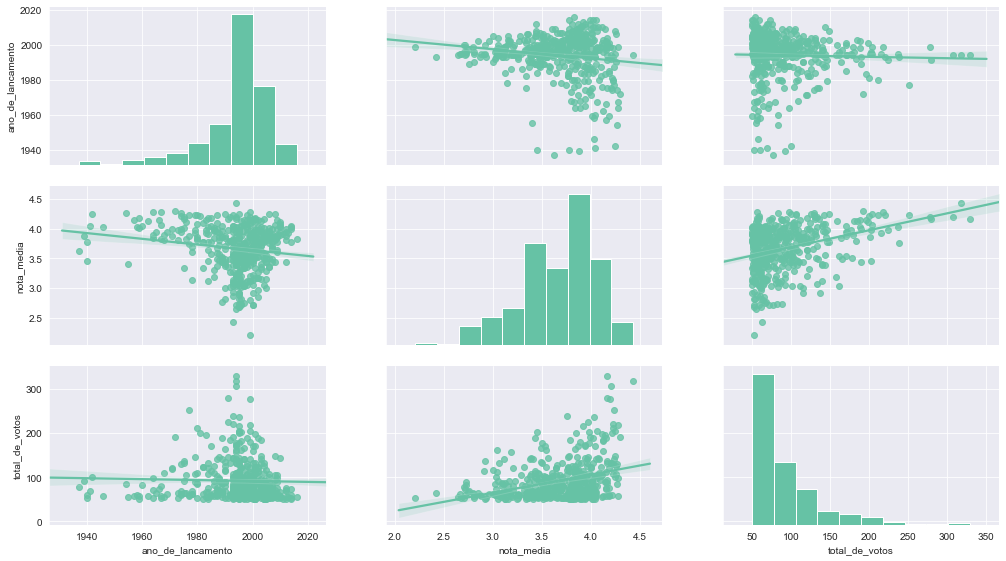

In [49]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]
ax = sns.pairplot(infos, kind='reg')
ax.fig.set_size_inches(15, 8)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

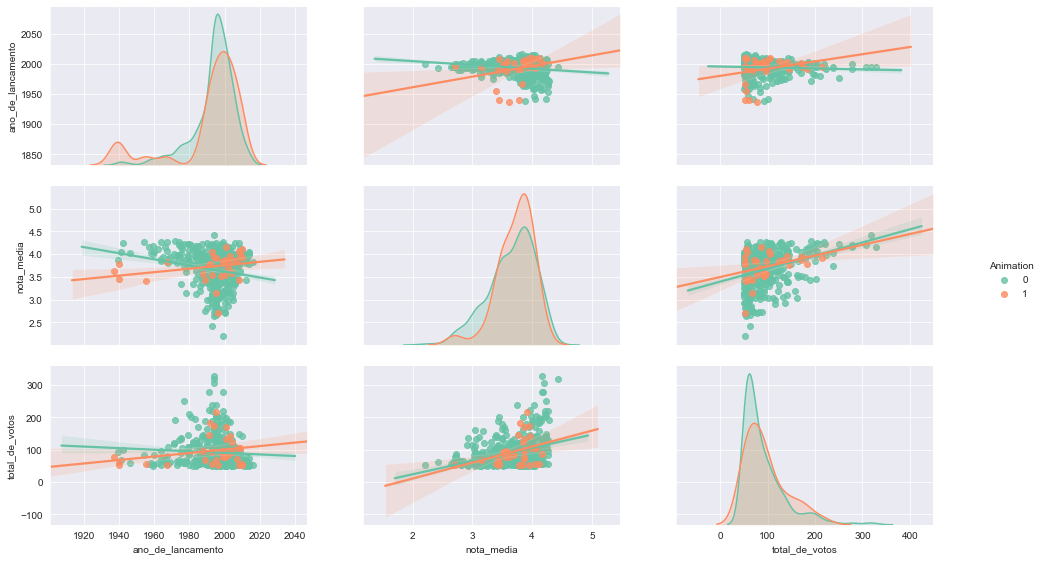

In [50]:
ax = sns.pairplot( filmes,y_vars=['ano_de_lancamento', 'nota_media', 'total_de_votos'], x_vars=['ano_de_lancamento', 'nota_media', 'total_de_votos'], kind='reg', hue='Animation')
ax.fig.set_size_inches(15, 8)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
    A nota dos filmes de 'Animation' parecem estar crescendo com o passar dos anos, assim como o total de votos. Entretanto não parece ser uma relação tão linear.
    Nas outras categorias as variáveis possuem a mesma tendência dos demais gêneros, exceto quando está relacionada ao ano_de_lancamento, apresenta um comportamento diferente das demais 
    


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

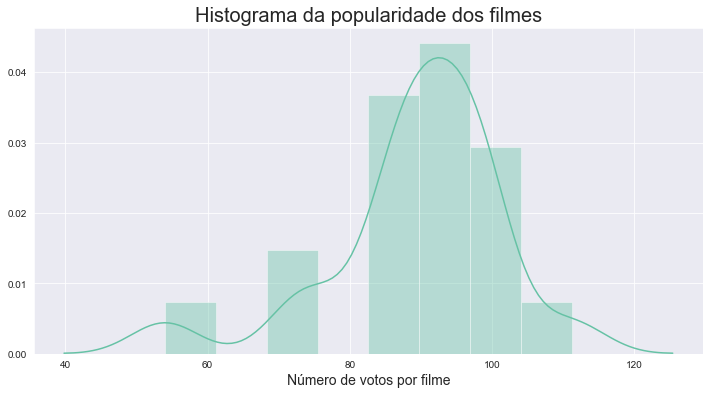

In [51]:
# solução
ax = sns.distplot(voto_por_filme)
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma da popularidade dos filmes', fontsize=20)
ax.set_xlabel('Número de votos por filme', fontsize=14);

In [52]:
_, p_valor = normaltest(voto_por_filme)
print(f'{p_valor* 100:.02f}% -> p_valor < 5% rejeita H0, portanto, a distribuição não é normal')

0.60% -> p_valor < 5% rejeita H0, portanto, a distribuição não é normal


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


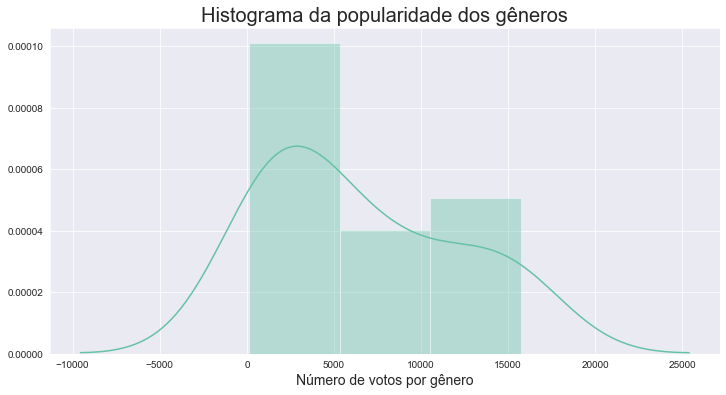

In [53]:
ax = sns.distplot(votos_por_genero_por_filme_ord)
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma da popularidade dos gêneros', fontsize=20)
ax.set_xlabel('Número de votos por gênero', fontsize=14);

In [54]:
_, p_valor = normaltest(votos_por_genero_por_filme_ord)
print(f'{p_valor* 100:.02f}% -> p_valor > 5% não rejeita H0, portanto, a distribuição é normal')

16.92% -> p_valor > 5% não rejeita H0, portanto, a distribuição é normal
